## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.10f}'.format
np.set_printoptions(precision=None, suppress=True)

In [2]:
df = pd.read_csv("zingat_usecase_trainset.csv")

In [3]:
df.head()

,tarih,path,güncel_fiyat,odasayısı,brütm²,netm²,emlaktipi,binayaşı,bulunduğukat,binadakikatsayısı,isıtmatipi,banyosayisi,manzara,otopark,İnterkom,depremyönetmeliğineuygun,asansör,Çocukoyunalanı,giyinmeodası,ebeveynbanyosu,Ilan_ID
0,2019-01-01,İstanbul/Beylikdüzü/Adnan Kahveci,1050000 TRY,5+2,380.0000000000,370.0000000000,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,VAR,VAR,VAR,1
1,2019-01-01,İstanbul/Kadıköy/Erenköy,547500 TRY,2+1,65.0000000000,55.0000000000,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,VAR,YOK,VAR,YOK,YOK,YOK,11
2,2019-01-01,İstanbul/Beylikdüzü/Adnan Kahveci,440000 TRY,3+1,205.0000000000,197.0000000000,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,YOK,YOK,VAR,10
3,2019-01-01,İstanbul/Beşiktaş/Nisbetiye,1450000 TRY,3+1,150.0000000000,130.0000000000,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",YOK,YOK,VAR,YOK,YOK,VAR,8
4,2019-01-01,İstanbul/Beylikdüzü/Cumhuriyet,169000 TRY,2+1,70.0000000000,65.0000000000,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64573 entries, 0 to 64572
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tarih                     64573 non-null  object 
 1   path                      64573 non-null  object 
 2   güncel_fiyat              64573 non-null  object 
 3   odasayısı                 64573 non-null  object 
 4   brütm²                    64573 non-null  float64
 5   netm²                     64573 non-null  float64
 6   emlaktipi                 64573 non-null  object 
 7   binayaşı                  64573 non-null  object 
 8   bulunduğukat              64573 non-null  object 
 9   binadakikatsayısı         64573 non-null  object 
 10  isıtmatipi                64573 non-null  object 
 11  banyosayisi               64573 non-null  object 
 12  manzara                   64573 non-null  object 
 13  otopark                   64573 non-null  object 
 14  İnterk

In [5]:
df.shape

(64573, 21)

In [6]:
df.isna().sum().all()

False

In [7]:
df.duplicated().any()

False

## Feature Engineering

#### Ilan_ID

In [8]:
df.Ilan_ID.nunique()

64573

In [9]:
df.drop("Ilan_ID", axis=1, inplace=True)

Ilan_ID her satırda farklı bir değer olduğu için düşürüldü

In [10]:
df.rename(columns={"path": "adres",             # Sütun isimleri kullanım kolaylığı açısından değiştirildi
                   "güncel_fiyat": "fiyat",
                   "odasayısı": "oda_sayısı",
                   "brütm²": "brüt_m2",
                   "netm²": "net_m2",
                   "emlaktipi": "emlak_tipi",
                   "binayaşı": "bina_yaşı",
                   "bulunduğukat": "bulunduğu_kat",
                   "binadakikatsayısı": "kat_sayısı",
                   "isıtmatipi": "ısıtma_tipi",
                   "banyosayisi": "banyo_sayısı",
                   "İnterkom": "interkom",
                   "depremyönetmeliğineuygun": "deprem_yönetmeliğine_uygun",
                   "Çocukoyunalanı": "çocuk_oyun_alanı",
                   "giyinmeodası": "giyinme_odası",
                   "ebeveynbanyosu": "ebeveyn_banyosu"}, inplace=True)

#### tarih

In [11]:
df['tarih'] = pd.to_datetime(df['tarih']) # Tarih sütunu yıl ve ay olmak üzere iki farklı sütuna ayrıldı
df['yıl'] = df['tarih'].apply(lambda date : date.year)
df['ay'] = df['tarih'].apply(lambda date : date.month)
df = df.drop('tarih', axis=1)
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,İstanbul/Beylikdüzü/Adnan Kahveci,1050000 TRY,5+2,380.0000000000,370.0000000000,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,VAR,VAR,VAR,2019,1
1,İstanbul/Kadıköy/Erenköy,547500 TRY,2+1,65.0000000000,55.0000000000,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,VAR,YOK,VAR,YOK,YOK,YOK,2019,1
2,İstanbul/Beylikdüzü/Adnan Kahveci,440000 TRY,3+1,205.0000000000,197.0000000000,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,YOK,YOK,VAR,2019,1
3,İstanbul/Beşiktaş/Nisbetiye,1450000 TRY,3+1,150.0000000000,130.0000000000,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",YOK,YOK,VAR,YOK,YOK,VAR,2019,1
4,İstanbul/Beylikdüzü/Cumhuriyet,169000 TRY,2+1,70.0000000000,65.0000000000,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,2019,1


#### fiyat

In [12]:
df['fiyat'] = df['fiyat'].str.replace(' TRY', '').astype("int64") # Fiyat sütunu integer olarak değiştirild.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64573 entries, 0 to 64572
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adres                       64573 non-null  object 
 1   fiyat                       64573 non-null  int64  
 2   oda_sayısı                  64573 non-null  object 
 3   brüt_m2                     64573 non-null  float64
 4   net_m2                      64573 non-null  float64
 5   emlak_tipi                  64573 non-null  object 
 6   bina_yaşı                   64573 non-null  object 
 7   bulunduğu_kat               64573 non-null  object 
 8   kat_sayısı                  64573 non-null  object 
 9   ısıtma_tipi                 64573 non-null  object 
 10  banyo_sayısı                64573 non-null  object 
 11  manzara                     64573 non-null  object 
 12  otopark                     64573 non-null  object 
 13  interkom                    645

#### interkom, deprem_yönetmeliğine_uygun, asansör, çocuk_oyun_alanı, giyinme_odası, ebeveyn_banyosu

In [14]:
ls = ["interkom", "deprem_yönetmeliğine_uygun", "asansör", # VAR ve YOK olarak belirtilen altı özellik 1 ve 0 olarak değiştirildi
      "çocuk_oyun_alanı", "giyinme_odası", "ebeveyn_banyosu"]
for i in ls:
    df[i] = df[i].map({'VAR': 1, 'YOK': 0})

In [15]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,İstanbul/Beylikdüzü/Adnan Kahveci,1050000,5+2,380.0000000000,370.0000000000,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",1,1,1,1,1,1,2019,1
1,İstanbul/Kadıköy/Erenköy,547500,2+1,65.0000000000,55.0000000000,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,1,0,1,0,0,0,2019,1
2,İstanbul/Beylikdüzü/Adnan Kahveci,440000,3+1,205.0000000000,197.0000000000,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",1,1,1,0,0,1,2019,1
3,İstanbul/Beşiktaş/Nisbetiye,1450000,3+1,150.0000000000,130.0000000000,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",0,0,1,0,0,1,2019,1
4,İstanbul/Beylikdüzü/Cumhuriyet,169000,2+1,70.0000000000,65.0000000000,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,1,0,1,0,1,1,2019,1


#### adres
Mahalleye kadar detaylı olan adres satırı sadece ilçe/mahalle kalacak şekilde sadeleştirildi

In [16]:
df.adres = df.adres.str.split('/', expand=True)[0].astype(
    str) + "/" + df.adres.str.split('/', expand=True)[1].astype(str)

#### oda_sayısı
oda_sayısı sütunu toplandı.

In [17]:
df['oda_sayısı'] = df['oda_sayısı'].replace("-","0+0")

In [18]:
df["oda_sayısı"] = df.oda_sayısı.str.split('+', expand=True)[0].astype("int64") + df.oda_sayısı.str.split('+', expand=True)[1].astype("int64") 

In [19]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,İstanbul/Beylikdüzü,1050000,7,380.0000000000,370.0000000000,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",1,1,1,1,1,1,2019,1
1,İstanbul/Kadıköy,547500,3,65.0000000000,55.0000000000,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,1,0,1,0,0,0,2019,1
2,İstanbul/Beylikdüzü,440000,4,205.0000000000,197.0000000000,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",1,1,1,0,0,1,2019,1
3,İstanbul/Beşiktaş,1450000,4,150.0000000000,130.0000000000,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",0,0,1,0,0,1,2019,1
4,İstanbul/Beylikdüzü,169000,3,70.0000000000,65.0000000000,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,1,0,1,0,1,1,2019,1


#### otopark
otopark sütununda var içerenler 1 diğerleri 0 olarak düzeltildi

In [20]:
df.otopark = df.otopark.str.contains("Var").astype("int64")

In [21]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,İstanbul/Beylikdüzü,1050000,7,380.0000000000,370.0000000000,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl",1,1,1,1,1,1,1,2019,1
1,İstanbul/Kadıköy,547500,3,65.0000000000,55.0000000000,Daire,0,1,7,Kombi (Doğalgaz),1,_,0,1,0,1,0,0,0,2019,1
2,İstanbul/Beylikdüzü,440000,4,205.0000000000,197.0000000000,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir",1,1,1,1,0,0,1,2019,1
3,İstanbul/Beşiktaş,1450000,4,150.0000000000,130.0000000000,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir",1,0,0,1,0,0,1,2019,1
4,İstanbul/Beylikdüzü,169000,3,70.0000000000,65.0000000000,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",1,1,0,1,0,1,1,2019,1


#### manzara
manzaralar ayrı sütunlara ayrıldı manzara değeri olmayanlar bilinmiyor olarak değiştirildi

In [22]:
df.manzara.value_counts()

_                                                                        41713
Şehir                                                                     7631
Doğa,Şehir                                                                2092
Cadde,Şehir                                                               1018
Boğaz,Cadde,Deniz,Havuz,Park,Şehir,Yeşil Alan,Göl,Nehir,Vadi,Dağ,Doğa      960
                                                                         ...  
Deniz,Yeşil Alan,Vadi,Havuz,Doğa,Park                                        1
Deniz,Yeşil Alan,Havuz,Doğa,Park                                             1
Cadde,Park,Şehir,Yeşil Alan,Göl,Nehir                                        1
Göl,Dağ                                                                      1
Yeşil Alan,Boğaz,Deniz,Park,Şehir                                            1
Name: manzara, Length: 917, dtype: int64

In [23]:
df["manzara_boğaz"] = 0
df["manzara_cadde"] = 0
df["manzara_dağ"] = 0
df["manzara_deniz"] = 0
df["manzara_doğa"] = 0
df["manzara_göl"] = 0
df["manzara_havuz"] = 0
df["manzara_nehir"] = 0
df["manzara_park"] = 0
df["manzara_şehir"] = 0
df["manzara_vadi"] = 0
df["manzara_yeşilalan"] = 0
df["manzara_bilinmiyor"] = 0

In [24]:
for i in range(df.shape[0]):
    if "Boğaz" in df.manzara[i]:
        df.manzara_boğaz[i] = 1
    if "Cadde" in df.manzara[i]:
        df.manzara_cadde[i] = 1
    if "Dağ" in df.manzara[i]:
        df.manzara_dağ[i] = 1
    if "Deniz" in df.manzara[i]:
        df.manzara_deniz[i] = 1
    if "Doğa" in df.manzara[i]:
        df.manzara_doğa[i] = 1
    if "Göl" in df.manzara[i]:
        df.manzara_göl[i] = 1
    if "Havuz" in df.manzara[i]:
        df.manzara_havuz[i] = 1
    if "Nehir" in df.manzara[i]:
        df.manzara_nehir[i] = 1
    if "Park" in df.manzara[i]:
        df.manzara_park[i] = 1
    if "Şehir" in df.manzara[i]:
        df.manzara_şehir[i] = 1
    if "Vadi" in df.manzara[i]:
        df.manzara_vadi[i] = 1
    if "Yeşil Alan" in df.manzara[i]:
        df.manzara_yeşilalan[i] = 1
    if "_" in df.manzara[i]:
        df.manzara_bilinmiyor[i] = 1

In [25]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
0,İstanbul/Beylikdüzü,1050000,7,380.0000000000,370.0000000000,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl",1,1,1,1,1,1,1,2019,1,0,1,0,1,0,1,0,0,0,0,0,0,0
1,İstanbul/Kadıköy,547500,3,65.0000000000,55.0000000000,Daire,0,1,7,Kombi (Doğalgaz),1,_,0,1,0,1,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,İstanbul/Beylikdüzü,440000,4,205.0000000000,197.0000000000,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir",1,1,1,1,0,0,1,2019,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,İstanbul/Beşiktaş,1450000,4,150.0000000000,130.0000000000,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir",1,0,0,1,0,0,1,2019,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,İstanbul/Beylikdüzü,169000,3,70.0000000000,65.0000000000,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",1,1,0,1,0,1,1,2019,1,1,0,0,1,1,1,0,0,0,0,0,0,0


In [26]:
df.drop("manzara", axis=1, inplace=True)

### Data Cleaning

#### Adres

In [27]:
df = df.groupby('adres').filter(lambda x : len(x)>=20)

In [28]:
df.shape

(64562, 33)

Adres olarak eğitime yeterli sayıda verisi olmayan değerler düşürüldü

#### oda_sayısı

In [29]:
df.oda_sayısı.value_counts()

4       25260
3       23727
5        5735
2        5038
6        2616
7        1107
8         413
1         282
9         155
10        114
0          38
11         28
12         20
1149       13
14          8
13          5
23          2
25          1
Name: oda_sayısı, dtype: int64

In [30]:
df = df.groupby('oda_sayısı').filter(lambda x : len(x)>20)

In [31]:
df.oda_sayısı.value_counts()

4     25260
3     23727
5      5735
2      5038
6      2616
7      1107
8       413
1       282
9       155
10      114
0        38
11       28
Name: oda_sayısı, dtype: int64

oda sayısı olarak eğitime yeterli sayıda verisi olmayan değerler düşürüldü

In [32]:
df.reset_index(drop=True, inplace=True)

#### brüt_m2

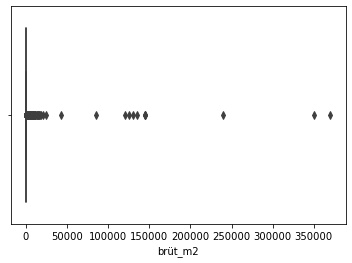

In [33]:
sns.boxplot(df.brüt_m2);

In [34]:
df[df.brüt_m2 < df.net_m2]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
1249,İzmir/Kemalpaşa,1650000,10,1.0000000000,600.0000000000,Köşk / Konak / Yalı,0,-,3,Klima,3,0,0,0,0,0,0,1,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5286,İstanbul/Beşiktaş,45000000,9,1.0000000000,950.0000000000,Villa,21-25 arası,Müstakil,4,Klima,4,1,1,0,1,0,1,1,2019,2,1,0,0,1,1,0,0,0,0,0,0,0,0
6483,İzmir/Çeşme,1250000,4,120.0000000000,300.0000000000,Villa,6-10 arası,-,2,-,2,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
8890,İstanbul/Beşiktaş,27000000,6,1.0000000000,309.0000000000,Villa,16-20 arası,Müstakil,3,Kombi (Doğalgaz),3,1,0,0,0,0,0,0,2019,3,0,0,0,0,1,0,0,0,0,0,0,0,0
13005,İzmir/Çeşme,17000000,6,1.0000000000,300.0000000000,Villa,6-10 arası,Müstakil,2,Kat Kaloriferi,5,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
13014,İzmir/Çeşme,3900000,7,1.0000000000,350.0000000000,Villa,6-10 arası,Müstakil,2,Klima,6 ve üzeri,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
13018,İzmir/Çeşme,12900000,9,5.0000000000,550.0000000000,Köşk / Konak / Yalı,0,-,2,Yerden Isıtma,6 ve üzeri,0,0,0,0,0,0,1,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
14810,İzmir/Karabağlar,235000,3,98.0000000000,100.0000000000,Daire,5,3,3,Kombi (Doğalgaz),1,0,1,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
16627,İzmir/Çeşme,3900000,7,1.0000000000,350.0000000000,Villa,6-10 arası,Müstakil,2,Klima,6 ve üzeri,0,0,0,0,0,0,0,2019,5,0,0,0,0,0,0,0,0,0,0,0,0,1
34166,İzmir/Seferihisar,250000,3,70.0000000000,90.0000000000,Yazlık,11-15 arası,Bahçe katı,3,Klima,1,0,0,0,0,0,0,0,2019,9,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
for i in range(df.shape[0]):
    if df.brüt_m2.iloc[i] < df.net_m2.iloc[i]:
        df.brüt_m2.iloc[i] = df.net_m2.iloc[i]

Brüt metrekare net metkrekareden küçük olamayacağı için bu durumda olan satırlarda ikisi eşitlendi

In [36]:
df[((df.brüt_m2 < 20) & (df.emlak_tipi != "Prefabrik Ev"))]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
325,İstanbul/Beylikdüzü,445000,5,10.0000000000,1.0000000000,Daire,-,-,-,-,2,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1977,İstanbul/Beylikdüzü,215000,3,2.0000000000,1.0000000000,Daire,0,5,9,Kombi (Doğalgaz),1,0,1,1,1,1,1,1,2019,1,0,1,0,0,0,0,1,0,1,1,0,1,0
5090,İstanbul/Beşiktaş,175000000,0,1.0000000000,1.0000000000,Villa,26-30 arası,Bahçe katı,4,Klima,6 ve üzeri,1,1,0,0,0,1,1,2019,2,1,0,0,1,1,0,0,0,0,1,0,0,0
23876,İzmir/Selçuk,220000,4,12.0000000000,1.0000000000,Müstakil Ev,-,-,-,-,1,0,0,0,0,0,0,0,2019,7,0,0,0,0,0,0,0,0,0,0,0,0,1
61470,İstanbul/Beylikdüzü,139000,3,11.0000000000,5.0000000000,Daire,0,2,10,Kombi (Doğalgaz),1,1,1,1,1,1,1,1,2020,3,1,1,1,1,1,1,1,1,1,1,1,1,0


In [37]:
df = df[~((df.brüt_m2 < 20) & (df.emlak_tipi != "Prefabrik Ev"))]

In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
df[(df.brüt_m2 > 10000) & (df.emlak_tipi != "Çiftlik Evi")]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
4035,İstanbul/Beylikdüzü,209000,3,10090.0000000000,90.0000000000,Daire,0,2,4,Kombi (Doğalgaz),1,0,1,0,1,0,0,0,2019,1,0,1,0,0,0,0,0,0,0,1,0,0,0
5788,İzmir/Urla,750000,3,17000.0000000000,45.0000000000,Prefabrik Ev,-,-,1,Güneş Enerjisi,1,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
6323,İstanbul/Kadıköy,1250000,4,15011.0000000000,117.0000000000,Daire,1,1,8,Merkezi Sistem (Isı Payı Ölçer),2,1,1,1,1,0,0,1,2019,2,0,1,0,0,0,0,0,0,0,1,0,0,0
9512,İzmir/Buca,232500,4,12011.0000000000,110.0000000000,Daire,16-20 arası,2,4,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
9915,İzmir/Buca,350000,4,125120.0000000000,120.0000000000,Daire,3,3,5,Kombi (Doğalgaz),2,1,1,1,1,0,0,1,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
13139,İzmir/Torbalı,220000,4,145000.0000000000,145000.0000000000,Daire,6-10 arası,5,5,Kombi (Doğalgaz),2,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
26234,İzmir/Torbalı,235000,4,145000.0000000000,130.0000000000,Daire,6-10 arası,5,7,Klima,2,0,0,0,0,0,0,0,2019,7,0,0,0,0,0,0,0,0,0,0,0,0,1
31012,İzmir/Karşıyaka,600000,4,120110.0000000000,110.0000000000,Daire,0,2,5,Kombi (Doğalgaz),2,0,1,1,1,0,0,0,2019,9,0,0,0,0,0,0,0,0,0,0,0,0,1
37479,İstanbul/Bağcılar,800000,8,350350.0000000000,300.0000000000,Daire,-,-,-,-,2,0,0,0,0,0,0,0,2019,10,0,0,0,0,0,0,0,0,0,0,0,0,1
40719,İstanbul/Pendik,260000,3,11010.0000000000,100.0000000000,Daire,6-10 arası,Bahçe katı,5,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,11,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df.brüt_m2.iloc[4035] = df.net_m2.iloc[4035]
df.brüt_m2.iloc[5788] = df.net_m2.iloc[5788]
df.brüt_m2.iloc[6323] = df.net_m2.iloc[6323]
df.brüt_m2.iloc[9512] = df.net_m2.iloc[9512]
df.brüt_m2.iloc[9915] = df.net_m2.iloc[9915]
df.brüt_m2.iloc[13139] = df.net_m2.iloc[13139] = 145
df.brüt_m2.iloc[26234] = df.net_m2.iloc[26234]
df.brüt_m2.iloc[31012] = df.net_m2.iloc[31012]
df.brüt_m2.iloc[37479] = df.net_m2.iloc[37479]
df.brüt_m2.iloc[40719] = df.net_m2.iloc[40719]
df.brüt_m2.iloc[42156] = df.net_m2.iloc[42156]
df.brüt_m2.iloc[46450] = df.net_m2.iloc[46450] = 125
df.brüt_m2.iloc[48338] = df.net_m2.iloc[48338]
df.brüt_m2.iloc[48786] = df.net_m2.iloc[48786]
df.brüt_m2.iloc[50933] = df.net_m2.iloc[50933]
df.brüt_m2.iloc[54475] = df.net_m2.iloc[54475]
df.brüt_m2.iloc[59990] = df.net_m2.iloc[59990]

In [41]:
df.drop(60441, inplace=True)

Yanlış giriş olduğu düşünülen brüt_m2 değerleri düzeltildi

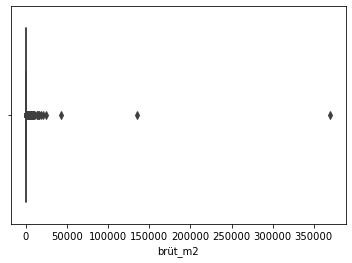

In [42]:
sns.boxplot(df.brüt_m2);

In [43]:
df = df[~(df.brüt_m2 > 50000)] #outlier değer düşürüldü

#### net_m2

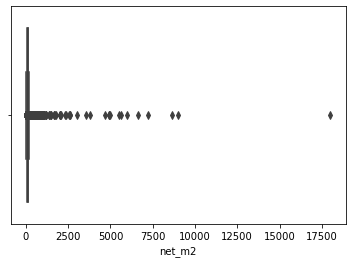

In [44]:
sns.boxplot(df.net_m2);

In [45]:
df[((df.net_m2 < 20) & (df.emlak_tipi != "Prefabrik Ev"))]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
4080,İstanbul/Beylikdüzü,130000,3,95.0000000000,8.0000000000,Daire,0,Bahçe katı,4,Kombi (Doğalgaz),1,0,1,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4126,İstanbul/Bağcılar,178000,3,95.0000000000,10.0000000000,Daire,16-20 arası,-,5,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4135,İstanbul/Bağcılar,185000,3,95.0000000000,10.0000000000,Daire,21-25 arası,2,6,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
4859,İzmir/Selçuk,200000,4,317.0000000000,4.0000000000,Müstakil Ev,-,-,-,-,1,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
6920,İzmir/Seferihisar,330000,4,130.0000000000,1.0000000000,Yazlık,6-10 arası,Müstakil,3,Yok,3,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
9308,İstanbul/Bağcılar,245000,3,110.0000000000,10.0000000000,Daire,5,-,5,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
9319,İzmir/Bornova,225000,1,22.0000000000,17.0000000000,Daire,0,1,7,Klima,1,1,0,0,1,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
9334,İzmir/Bornova,225000,1,22.0000000000,17.0000000000,Daire,0,2,7,Klima,1,1,0,0,1,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
9771,İstanbul/Pendik,480000,4,3540.0000000000,3.0000000000,Çiftlik Evi,0,-,3,Yok,2,0,0,1,0,0,0,0,2019,3,0,1,0,0,1,0,0,0,0,1,0,0,0
11823,İstanbul/Beşiktaş,132500000,11,1300.0000000000,1.0000000000,Rezidans,11-15 arası,20 ve üzeri,20 ve üzeri,Fancoil,6 ve üzeri,1,1,0,0,0,0,1,2019,4,1,0,0,1,0,0,0,0,0,1,0,0,0


In [46]:
df = df[~((df.net_m2 < 20) & (df.emlak_tipi != "Prefabrik Ev"))]

In [47]:
df.reset_index(drop=True, inplace=True)

In [48]:
df[(df.net_m2 > 2500)] 

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
2280,İzmir/Kemalpaşa,1250000,7,4700.0000000000,4650.0000000000,Villa,3,-,3,Klima,3,1,0,0,0,0,1,1,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6589,İzmir/Tire,750000,3,24165.0000000000,5600.0000000000,Çiftlik Evi,5,-,1,Kat Kaloriferi,1,1,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
11244,İzmir/Urla,2900000,10,6625.0000000000,6600.0000000000,Çiftlik Evi,-,-,-,-,3,0,0,0,0,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
11587,İzmir/Torbalı,985000,5,5000.0000000000,4900.0000000000,Çiftlik Evi,0,-,1,Soba (Kömür),2,1,0,1,0,0,0,1,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
12442,İzmir/Kemalpaşa,4250000,4,10000.0000000000,8650.0000000000,Çiftlik Evi,3,-,1,Kombi (Doğalgaz),2,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
14836,İzmir/Çeşme,6000000,9,6000.0000000000,5999.0000000000,Müstakil Ev,-,-,-,-,1,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
16454,İzmir/Bayındır,250000,3,2550.0000000000,2547.0000000000,Müstakil Ev,16-20 arası,Müstakil,1,Soba (Kömür),1,0,0,0,0,0,0,0,2019,5,0,0,0,0,0,0,0,0,0,0,0,0,1
17819,İzmir/Buca,1950000,4,5000.0000000000,4999.0000000000,Villa,-,-,-,-,1,0,0,0,0,0,0,0,2019,5,0,0,0,0,0,0,0,0,0,0,0,0,1
22439,İzmir/Foça,1700000,5,7196.0000000000,7195.0000000000,Villa,11-15 arası,Müstakil,2,Soba (Kömür),2,0,0,0,0,0,0,0,2019,6,0,0,0,0,0,0,0,0,0,0,0,0,1
33367,İzmir/Menderes,1350000,4,3558.0000000000,3550.0000000000,Müstakil Ev,2,Müstakil,1,Klima,2,1,0,1,0,0,1,1,2019,9,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
df.drop(42961, inplace=True)

In [50]:
df.reset_index(drop=True, inplace=True)

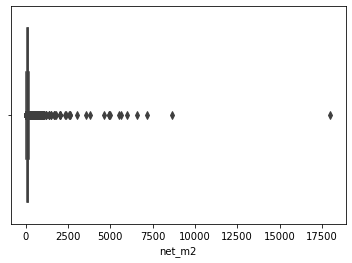

In [51]:
sns.boxplot(df.net_m2);

#### Fiyat

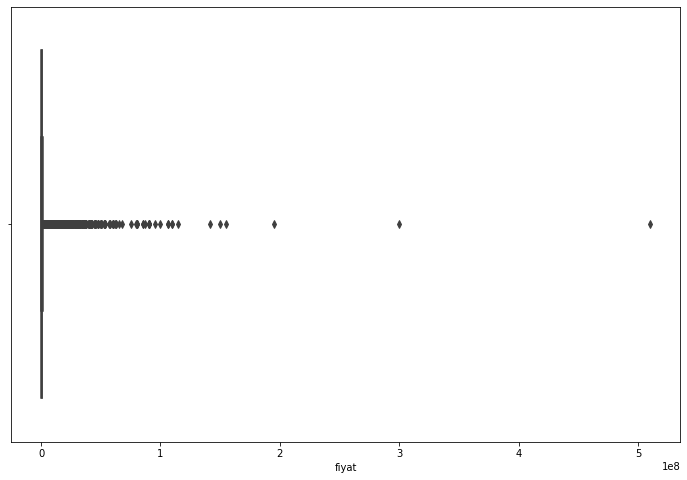

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(df.fiyat);

In [53]:
df[((df.fiyat < 10000) & (df.emlak_tipi != "Prefabrik Ev"))]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
29,İzmir/Menderes,900,3,85.0000000000,80.0000000000,Daire,0,Yüksek Giriş,3,Kombi (Doğalgaz),1,0,0,1,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
136,İstanbul/Beylikdüzü,1300,3,110.0000000000,100.0000000000,Daire,0,2,10-20 arası,Kombi (Doğalgaz),1,1,1,1,1,1,0,0,2019,1,0,1,0,0,0,0,0,0,1,1,0,0,0
141,İstanbul/Kadıköy,2800,4,145.0000000000,110.0000000000,Daire,4,4,7,Merkezi Sistem,1,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2484,İstanbul/Pendik,5750,5,180.0000000000,170.0000000000,Daire,5,Kot 4,4,Kalorifer (Doğalgaz),1,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3036,İstanbul/Beylikdüzü,2100,3,175.0000000000,160.0000000000,Daire,0,2,6,Kombi (Doğalgaz),2,0,1,1,1,0,0,1,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3187,İzmir/Karşıyaka,2200,3,90.0000000000,85.0000000000,Daire,0,1,5,Kombi (Doğalgaz),1,1,1,1,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4120,İzmir/Buca,1200,3,110.0000000000,100.0000000000,Daire,16-20 arası,4,4,Kombi (Doğalgaz),1,0,1,1,1,1,1,1,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
6143,İzmir/Balçova,6000,8,400.0000000000,380.0000000000,Daire,11-15 arası,4,4,Jeotermal,4,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
7171,İzmir/Buca,1200,3,100.0000000000,90.0000000000,Daire,2,1,4,Kombi (Doğalgaz),1,0,1,0,1,1,1,1,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
7310,İstanbul/Pendik,450,3,105.0000000000,95.0000000000,Daire,0,1,10,Merkezi Sistem (Isı Payı Ölçer),1,1,1,1,1,1,0,0,2019,2,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
df = df[~((df.fiyat < 10000) & (df.emlak_tipi != "Prefabrik Ev"))]

In [55]:
df.reset_index(drop=True, inplace=True)

In [56]:
df.shape

(64409, 33)

In [57]:
df[((df.fiyat > 30000000) & (df.emlak_tipi == "Daire") & (df.net_m2 < 200))]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
2626,İstanbul/Bağcılar,510000000,4,180.0000000000,170.0000000000,Daire,16-20 arası,2,5,Kalorifer (Doğalgaz),1,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3337,İstanbul/Bağcılar,300000000,4,140.0000000000,130.0000000000,Daire,-,2,5,Kalorifer (Doğalgaz),2,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
57152,İstanbul/Beylikdüzü,85500000,2,95.0000000000,65.0000000000,Daire,0,Bahçe katı,7,Klima,1,1,0,0,1,0,1,1,2020,2,0,0,0,0,0,1,0,0,0,0,0,0,0
62807,İstanbul/Bağcılar,110000000,3,100.0000000000,90.0000000000,Daire,16-20 arası,Çatı Katı,6,Soba (Kömür),1,0,0,0,0,0,0,0,2020,4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
df = df[~((df.fiyat > 30000000) & (df.emlak_tipi == "Daire") & (df.net_m2 < 200))]

In [59]:
df.reset_index(drop=True, inplace=True)

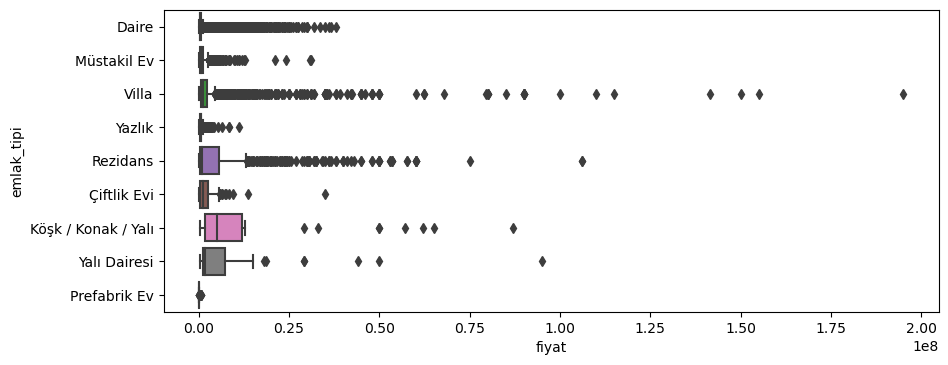

In [60]:
plt.figure(figsize=(10,4),dpi=100)
sns.boxplot(x="fiyat",y="emlak_tipi", data=df);

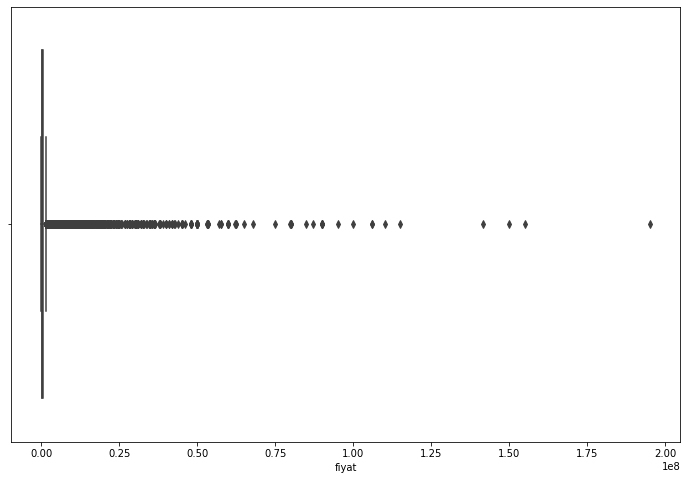

In [61]:
plt.figure(figsize=(12,8))
sns.boxplot(df.fiyat);

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64405 entries, 0 to 64404
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adres                       64405 non-null  object 
 1   fiyat                       64405 non-null  int64  
 2   oda_sayısı                  64405 non-null  int64  
 3   brüt_m2                     64405 non-null  float64
 4   net_m2                      64405 non-null  float64
 5   emlak_tipi                  64405 non-null  object 
 6   bina_yaşı                   64405 non-null  object 
 7   bulunduğu_kat               64405 non-null  object 
 8   kat_sayısı                  64405 non-null  object 
 9   ısıtma_tipi                 64405 non-null  object 
 10  banyo_sayısı                64405 non-null  object 
 11  otopark                     64405 non-null  int64  
 12  interkom                    64405 non-null  int64  
 13  deprem_yönetmeliğine_uygun  644

In [63]:
df.oda_sayısı = df.oda_sayısı.astype("int64")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64405 entries, 0 to 64404
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adres                       64405 non-null  object 
 1   fiyat                       64405 non-null  int64  
 2   oda_sayısı                  64405 non-null  int64  
 3   brüt_m2                     64405 non-null  float64
 4   net_m2                      64405 non-null  float64
 5   emlak_tipi                  64405 non-null  object 
 6   bina_yaşı                   64405 non-null  object 
 7   bulunduğu_kat               64405 non-null  object 
 8   kat_sayısı                  64405 non-null  object 
 9   ısıtma_tipi                 64405 non-null  object 
 10  banyo_sayısı                64405 non-null  object 
 11  otopark                     64405 non-null  int64  
 12  interkom                    64405 non-null  int64  
 13  deprem_yönetmeliğine_uygun  644

<AxesSubplot:>

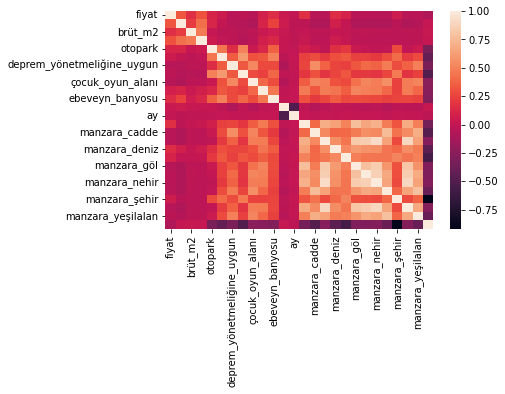

In [65]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='fiyat', ylabel='Density'>

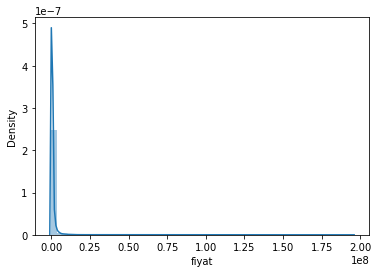

In [66]:
sns.distplot(df.fiyat)

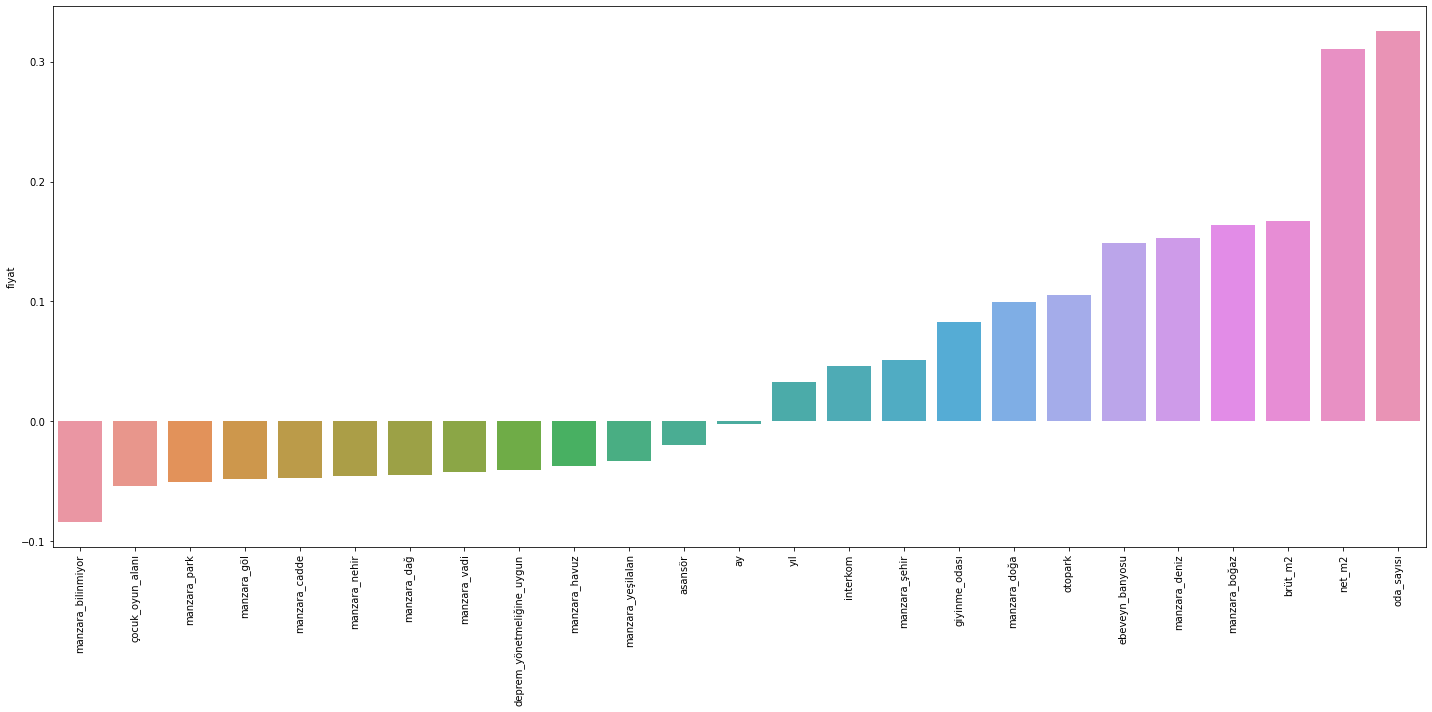

In [67]:
corr_by_price = df.corr()["fiyat"].sort_values()[:-1]

plt.figure(figsize=(20, 10))
sns.barplot(x=corr_by_price.index, y=corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout()

In [68]:
df = pd.get_dummies(data=df, columns=["adres", 
                                 "emlak_tipi", 
                                 "bina_yaşı", 
                                 "bulunduğu_kat", 
                                "kat_sayısı",
                                "ısıtma_tipi",
                                "banyo_sayısı"], drop_first=True)

## Data Pre-processing

#### Train-Test Split

In [69]:
X = df.drop("fiyat", axis=1)
y = df["fiyat"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [71]:
X_train_columns = X_train.columns

In [72]:
X_train_columns

Index(['oda_sayısı', 'brüt_m2', 'net_m2', 'otopark', 'interkom',
       'deprem_yönetmeliğine_uygun', 'asansör', 'çocuk_oyun_alanı',
       'giyinme_odası', 'ebeveyn_banyosu',
       ...
       'ısıtma_tipi_Soba (Kömür)', 'ısıtma_tipi_Yerden Isıtma',
       'ısıtma_tipi_Yok', 'banyo_sayısı_0', 'banyo_sayısı_1', 'banyo_sayısı_2',
       'banyo_sayısı_3', 'banyo_sayısı_4', 'banyo_sayısı_5',
       'banyo_sayısı_6 ve üzeri'],
      dtype='object', length=147)

#### Scaler

In [73]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

#### Evaluation Metrics

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

#### Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.4653916228561583 
 mae: 693000.9359227893 
 mse: 4381585888512.903 
 rmse: 2093223.8027771667


#### Ridge Regression

In [145]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.4656441096547276 
 mae: 693083.3237580498 
 mse: 4379516537112.9917 
 rmse: 2092729.446706619


#### Lasso Regression

In [146]:
from sklearn.linear_model import Lasso, LassoCV
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.4653963048260453 
 mae: 692966.814774769 
 mse: 4381547515651.4507 
 rmse: 2093214.6367851174


In [147]:
alpha_space = np.linspace(1330, 1340, 100)
alpha_space

array([1330.        , 1330.1010101 , 1330.2020202 , 1330.3030303 ,
       1330.4040404 , 1330.50505051, 1330.60606061, 1330.70707071,
       1330.80808081, 1330.90909091, 1331.01010101, 1331.11111111,
       1331.21212121, 1331.31313131, 1331.41414141, 1331.51515152,
       1331.61616162, 1331.71717172, 1331.81818182, 1331.91919192,
       1332.02020202, 1332.12121212, 1332.22222222, 1332.32323232,
       1332.42424242, 1332.52525253, 1332.62626263, 1332.72727273,
       1332.82828283, 1332.92929293, 1333.03030303, 1333.13131313,
       1333.23232323, 1333.33333333, 1333.43434343, 1333.53535354,
       1333.63636364, 1333.73737374, 1333.83838384, 1333.93939394,
       1334.04040404, 1334.14141414, 1334.24242424, 1334.34343434,
       1334.44444444, 1334.54545455, 1334.64646465, 1334.74747475,
       1334.84848485, 1334.94949495, 1335.05050505, 1335.15151515,
       1335.25252525, 1335.35353535, 1335.45454545, 1335.55555556,
       1335.65656566, 1335.75757576, 1335.85858586, 1335.95959

In [148]:
lasso_cv_model = LassoCV(alphas=alpha_space,  cv=10,
                         max_iter=100000, n_jobs=-1).fit(X_train, y_train)

In [149]:
lasso_cv_model.alpha_

1330.0

In [150]:
y_pred = lasso_cv_model.predict(X_test)

In [151]:
eval_metrics(y_test, y_pred)

r2_score: 0.4661286258374857 
 mae: 672664.5070570814 
 mse: 4375545500818.217 
 rmse: 2091780.4619075628


#### RandomForest

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8629698237043061 
 mae: 248906.38444239012 
 mse: 1123082825535.4888 
 rmse: 1059756.0217028677


In [88]:
X_scaled = scaler.transform(X)

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_scaled, y)


RandomForestRegressor(n_jobs=-1)

In [102]:
y_pred = rf_model.predict(X_scaled)

In [103]:
my_dict = {"Actual" : y, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
2145,200000,201578.3333333333
49414,325000,322585.0000000000
51229,35000000,31358000.0000000000
31353,1150000,1122550.0000000000
32250,366000,319510.0000000000
57391,375000,365050.0000000000
24161,210000,245833.3333333333
58224,1300000,1127430.0000000000
31959,465000,404640.0000000000
53516,300000,298300.0000000000


In [104]:
eval_metrics(y, y_pred)

r2_score: 0.978381657947986 
 mae: 95078.97309660498 
 mse: 216363373694.11716 
 rmse: 465148.7651215653


In [154]:
compare["Diff"] = compare.Actual - compare.Pred

In [155]:
compare.Pred.sort_values()

28061    8.504000e+03
23015    9.945280e+03
8206     1.031167e+04
13645    1.064933e+04
13671    1.064933e+04
             ...     
43104    5.754000e+07
60029    5.826850e+07
5090     6.789600e+07
59944    8.416600e+07
62408    8.545500e+07
Name: Pred, Length: 12881, dtype: float64

In [156]:
compare["Diff"][compare.Diff < -5000000].sort_values()

59944   -47666000.0
51097   -18604250.0
43101   -13722500.0
848     -12407800.0
60066   -10868500.0
212     -10555000.0
51646   -10026500.0
25819    -9952500.0
40871    -9710500.0
50997    -9127467.6
35815    -8662500.0
30560    -8625500.0
50233    -8445200.0
39977    -8323750.0
5090     -7896000.0
63246    -7851000.0
43122    -7836000.0
22924    -7826950.0
4981     -7754500.0
62635    -7642500.0
43167    -7109500.0
42619    -7108200.0
30797    -6772700.0
60130    -6758000.0
62094    -6285500.0
43497    -6190000.0
26542    -5734000.0
59953    -5717278.4
12570    -5711000.0
45391    -5618150.0
5262     -5445000.0
29891    -5294850.0
10192    -5155000.0
26066    -5129050.0
7703     -5036500.0
Name: Diff, dtype: float64

In [160]:
df.iloc[51097]

fiyat                                         3000000.0000000000
oda_sayısı                                          6.0000000000
brüt_m2                                           600.0000000000
net_m2                                            250.0000000000
otopark                                             0.0000000000
interkom                                            1.0000000000
deprem_yönetmeliğine_uygun                          0.0000000000
asansör                                             0.0000000000
çocuk_oyun_alanı                                    0.0000000000
giyinme_odası                                       1.0000000000
ebeveyn_banyosu                                     1.0000000000
yıl                                              2020.0000000000
ay                                                  1.0000000000
manzara_boğaz                                       1.0000000000
manzara_cadde                                       0.0000000000
manzara_dağ              

In [90]:
df_test = pd.read_csv("Hazır_test_verisi.csv")

In [91]:
df_test.head()

,adres,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
0,İzmir/Konak,5,165.0000000000,155.0000000000,Daire,31-35 arası,6,7,Kombi (Doğalgaz),1,0,0,0,0,0,1,0,2020,4,0,0,0,0,0,0,0,0,0,0,0,0,1
1,İzmir/Ödemiş,3,130.0000000000,120.0000000000,Daire,6-10 arası,2,2,Klima,1,0,0,0,0,0,0,0,2020,4,0,0,0,0,0,0,0,0,0,0,0,0,1
2,İzmir/Karşıyaka,4,182.0000000000,153.0000000000,Daire,0,7,10-20 arası,Yerden Isıtma,2,0,0,0,0,0,0,0,2020,4,0,0,0,0,0,0,0,0,0,0,0,0,1
3,İzmir/Ödemiş,3,130.0000000000,120.0000000000,Daire,6-10 arası,2,2,Klima,1,0,0,0,0,0,0,0,2020,4,0,0,0,0,0,0,0,0,0,0,0,0,1
4,İstanbul/Beylikdüzü,4,125.0000000000,120.0000000000,Daire,0,6,6,Kombi (Doğalgaz),1,0,1,1,1,1,1,1,2020,4,1,1,1,1,1,1,0,0,0,0,0,0,0


In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35127 entries, 0 to 35126
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adres                       35127 non-null  object 
 1   oda_sayısı                  35127 non-null  int64  
 2   brüt_m2                     35127 non-null  float64
 3   net_m2                      35127 non-null  float64
 4   emlak_tipi                  35127 non-null  object 
 5   bina_yaşı                   35127 non-null  object 
 6   bulunduğu_kat               35127 non-null  object 
 7   kat_sayısı                  35127 non-null  object 
 8   ısıtma_tipi                 35127 non-null  object 
 9   banyo_sayısı                35127 non-null  object 
 10  otopark                     35127 non-null  int64  
 11  interkom                    35127 non-null  int64  
 12  deprem_yönetmeliğine_uygun  35127 non-null  int64  
 13  asansör                     351

In [93]:
df_test = pd.get_dummies(df_test).reindex(columns=X_train_columns, fill_value=0)

In [94]:
df_test = scaler.transform(df_test)

In [95]:
final_pred = rf_model.predict(df_test)

In [96]:
final_pred.shape

(35127,)

In [97]:
submission = pd.read_csv("sample_submission_zingat.csv")

In [98]:
submission.head()

,Id,Expected
0,64650,0
1,64651,0
2,64652,0
3,64653,0
4,64654,0


In [99]:
submission["Expected"] = final_pred

In [100]:
submission.head()

,Id,Expected
0,64650,1043940.0000000000
1,64651,279680.0000000000
2,64652,1157020.0000000000
3,64653,279680.0000000000
4,64654,242910.0000000000


In [101]:
submission.to_csv("Submission_V1.csv", index=False)

#### XGBoost

In [94]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred= xgb_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8153918819096779 
 mae: 286017.6679405092 
 mse: 1513025907769.9458 
 rmse: 1230051.1809554698


#### CatBoost

In [95]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(verbose=False)
cb_model.fit(X_train, y_train)
y_pred= cb_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8569243453070416 
 mae: 281169.82748853846 
 mse: 1172630838561.922 
 rmse: 1082880.8053345124


### Deep Learning

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [98]:
X_train.shape

(51524, 147)

In [99]:
model = Sequential()

model.add(Dense(147, activation = 'relu'))
model.add(Dense(147, activation = 'relu'))
model.add(Dense(147, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [101]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=700)

Epoch 1/700
403/403 [==============================] - 1s 1ms/step - loss: 2728935030784.0000 - val_loss: 1972254277632.0000
Epoch 2/700
403/403 [==============================] - 1s 2ms/step - loss: 2701968015360.0000 - val_loss: 1967219408896.0000
Epoch 3/700
403/403 [==============================] - 1s 1ms/step - loss: 2689108279296.0000 - val_loss: 1958917439488.0000
Epoch 4/700
403/403 [==============================] - 1s 1ms/step - loss: 2732740050944.0000 - val_loss: 1971005161472.0000
Epoch 5/700
403/403 [==============================] - 1s 2ms/step - loss: 2676526153728.0000 - val_loss: 1977255329792.0000
Epoch 6/700
403/403 [==============================] - 1s 1ms/step - loss: 2659079684096.0000 - val_loss: 1963391451136.0000
Epoch 7/700
403/403 [==============================] - 1s 2ms/step - loss: 2658960670720.0000 - val_loss: 1970730958848.0000
Epoch 8/700
403/403 [==============================] - 1s 2ms/step - loss: 2623312494592.0000 - val_loss: 1977121505280.0000


403/403 [==============================] - 1s 2ms/step - loss: 1899928223744.0000 - val_loss: 2125020659712.0000
Epoch 67/700
403/403 [==============================] - 1s 2ms/step - loss: 1900888981504.0000 - val_loss: 2106673725440.0000
Epoch 68/700
403/403 [==============================] - 1s 2ms/step - loss: 1890526167040.0000 - val_loss: 2126705328128.0000
Epoch 69/700
403/403 [==============================] - 1s 2ms/step - loss: 1836485836800.0000 - val_loss: 2129627709440.0000
Epoch 70/700
403/403 [==============================] - 1s 2ms/step - loss: 1834420011008.0000 - val_loss: 2169003966464.0000
Epoch 71/700
403/403 [==============================] - 1s 2ms/step - loss: 1796122083328.0000 - val_loss: 2184837332992.0000
Epoch 72/700
403/403 [==============================] - 1s 1ms/step - loss: 1842511609856.0000 - val_loss: 2172994322432.0000
Epoch 73/700
403/403 [==============================] - 1s 2ms/step - loss: 1813735407616.0000 - val_loss: 2135103242240.0000
Epoch

Epoch 131/700
403/403 [==============================] - 1s 2ms/step - loss: 1300421935104.0000 - val_loss: 2362086785024.0000
Epoch 132/700
403/403 [==============================] - 1s 2ms/step - loss: 1266626592768.0000 - val_loss: 2216352022528.0000
Epoch 133/700
403/403 [==============================] - 1s 1ms/step - loss: 1286896353280.0000 - val_loss: 2238900862976.0000
Epoch 134/700
403/403 [==============================] - 1s 2ms/step - loss: 1286616645632.0000 - val_loss: 2228878573568.0000
Epoch 135/700
403/403 [==============================] - 1s 2ms/step - loss: 1283997040640.0000 - val_loss: 2205432676352.0000
Epoch 136/700
403/403 [==============================] - 1s 2ms/step - loss: 1301060780032.0000 - val_loss: 2215792869376.0000
Epoch 137/700
403/403 [==============================] - 1s 2ms/step - loss: 1222908706816.0000 - val_loss: 2215021903872.0000
Epoch 138/700
403/403 [==============================] - 1s 1ms/step - loss: 1254106857472.0000 - val_loss: 230

403/403 [==============================] - 1s 1ms/step - loss: 673989001216.0000 - val_loss: 2064855990272.0000
Epoch 261/700
403/403 [==============================] - 1s 1ms/step - loss: 652886474752.0000 - val_loss: 2050706112512.0000
Epoch 262/700
403/403 [==============================] - 1s 1ms/step - loss: 631630528512.0000 - val_loss: 2136884903936.0000
Epoch 263/700
403/403 [==============================] - 1s 1ms/step - loss: 643528523776.0000 - val_loss: 2088167538688.0000
Epoch 264/700
403/403 [==============================] - 1s 1ms/step - loss: 742756450304.0000 - val_loss: 2139074985984.0000
Epoch 265/700
403/403 [==============================] - 1s 2ms/step - loss: 631833886720.0000 - val_loss: 2041621250048.0000
Epoch 266/700
403/403 [==============================] - 1s 2ms/step - loss: 634803388416.0000 - val_loss: 2045957373952.0000
Epoch 267/700
403/403 [==============================] - 1s 2ms/step - loss: 620540395520.0000 - val_loss: 2036608270336.0000
Epoch 

403/403 [==============================] - 1s 2ms/step - loss: 333777043456.0000 - val_loss: 1996876808192.0000
Epoch 391/700
403/403 [==============================] - 1s 2ms/step - loss: 313416548352.0000 - val_loss: 2068556414976.0000
Epoch 392/700
403/403 [==============================] - 1s 1ms/step - loss: 306886574080.0000 - val_loss: 2246212583424.0000
Epoch 393/700
403/403 [==============================] - 1s 2ms/step - loss: 317185359872.0000 - val_loss: 2013990748160.0000
Epoch 394/700
403/403 [==============================] - 1s 2ms/step - loss: 321839071232.0000 - val_loss: 1969059266560.0000
Epoch 395/700
403/403 [==============================] - 1s 1ms/step - loss: 344235081728.0000 - val_loss: 2042600751104.0000
Epoch 396/700
403/403 [==============================] - 1s 1ms/step - loss: 328854241280.0000 - val_loss: 2048825098240.0000
Epoch 397/700
403/403 [==============================] - 1s 1ms/step - loss: 314840481792.0000 - val_loss: 2004409516032.0000
Epoch 

403/403 [==============================] - 1s 2ms/step - loss: 206432206848.0000 - val_loss: 2216351498240.0000
Epoch 521/700
403/403 [==============================] - 1s 1ms/step - loss: 179425869824.0000 - val_loss: 2321376870400.0000
Epoch 522/700
403/403 [==============================] - 1s 2ms/step - loss: 169218097152.0000 - val_loss: 2179468361728.0000
Epoch 523/700
403/403 [==============================] - 1s 1ms/step - loss: 187286077440.0000 - val_loss: 2310990725120.0000
Epoch 524/700
403/403 [==============================] - 1s 2ms/step - loss: 194380759040.0000 - val_loss: 2279818395648.0000
Epoch 525/700
403/403 [==============================] - 1s 2ms/step - loss: 195365994496.0000 - val_loss: 2341801558016.0000
Epoch 526/700
403/403 [==============================] - 1s 2ms/step - loss: 203436589056.0000 - val_loss: 2297895583744.0000
Epoch 527/700
403/403 [==============================] - 1s 1ms/step - loss: 204131500032.0000 - val_loss: 2283845713920.0000
Epoch 

403/403 [==============================] - 1s 2ms/step - loss: 177234608128.0000 - val_loss: 2312459255808.0000
Epoch 651/700
403/403 [==============================] - 1s 1ms/step - loss: 193050591232.0000 - val_loss: 2423443161088.0000
Epoch 652/700
403/403 [==============================] - 1s 1ms/step - loss: 169263661056.0000 - val_loss: 2277191188480.0000
Epoch 653/700
403/403 [==============================] - 1s 1ms/step - loss: 141415284736.0000 - val_loss: 2172649603072.0000
Epoch 654/700
403/403 [==============================] - 1s 1ms/step - loss: 145253941248.0000 - val_loss: 2305867382784.0000
Epoch 655/700
403/403 [==============================] - 1s 2ms/step - loss: 152044224512.0000 - val_loss: 2255572959232.0000
Epoch 656/700
403/403 [==============================] - 1s 2ms/step - loss: 182842884096.0000 - val_loss: 2278103187456.0000
Epoch 657/700
403/403 [==============================] - 1s 2ms/step - loss: 160176209920.0000 - val_loss: 2587741126656.0000
Epoch 

#### Model Performance

In [103]:
y_pred = model.predict(X_test)

In [105]:
eval_metrics(y_test,y_pred)

r2_score: 0.7115348148980936 
 mae: 324110.6433248947 
 mse: 2364225923885.405 
 rmse: 1537603.9554727364


In [106]:
model.evaluate(X_test, y_test, verbose=0)

2364226666496.0

In [108]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
12758,380000,3.397514e+05
38610,700000,7.209528e+05
31502,197000,3.426473e+05
52576,380000,5.318059e+05
30762,259000,2.794569e+05
29034,770000,4.504471e+05
58186,1750000,1.838531e+06
29423,170000,1.955809e+05
12283,184000,1.955809e+05
15992,1980000,1.473174e+06


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

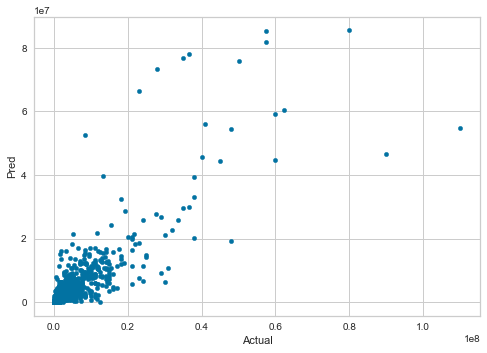

In [109]:
compare.plot(x="Actual", y="Pred", kind="scatter")

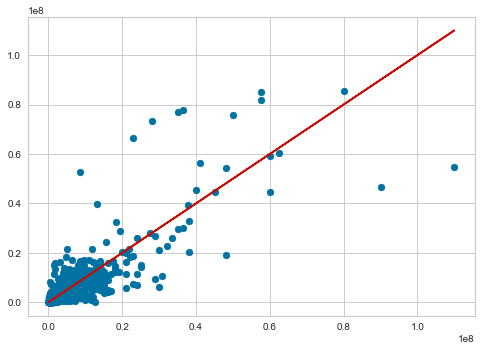

In [110]:
# Our predictions
plt.scatter(y_test, y_pred)

# Perfect predictions
plt.plot(y_test, y_test, 'r');

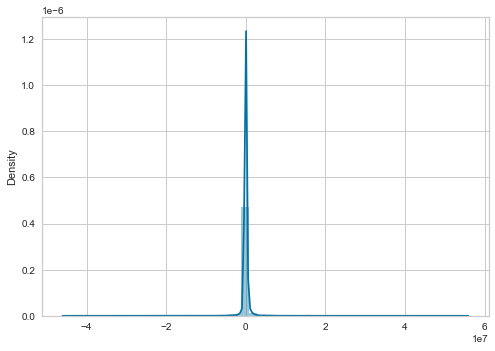

In [111]:
errors = y_test.values.reshape(-1, 1) - y_pred
sns.distplot(errors);

In [112]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [114]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    # FIT MODEL TRAINING
    model.fit(X_train,y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    eval_metrics(y_test, preds)
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,8),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [ ]:
svr = SVR()
param_grid = {"C": [0.01,0.1,1,5,10,100,1000], "gamma":["auto","scale"]}

grid = GridSearchCV(svr,param_grid)
run_model(grid, X_train, y_train, X_test, y_test)